## Churn Analysis Using Machine Learning, Logistic Regression
* Note: Since not covered in class as yet, used ChatGPT extensively for learning and code generation.

In [86]:
# Import the required libraries and dependencies
import pandas as pd

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import json
import dataframe_utils

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

## Read in the csv and evaluate missing values

In [87]:
def prt_sep():
    print("")
    print("-----------------------------------------------------------------------------------------------")
    print("")


def df_characteristics(df):
    print("df.head")
    display(df.head())
    prt_sep()
    print("df.info")
    display(df.info())
    prt_sep()
    print("df.describe()")
    display(df.describe())
    prt_sep()
    print("df.isnull().sum()")
    display(df.isnull().sum())
    prt_sep

df = pd.read_csv("Resources/account_predict_data.csv")

df_characteristics(df)
prt_sep()


df.head


,gender,tenure,phone_services,internet_services,contract_duration,payment_method,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,...,churn,trigger_point,churn_surv,uuid,trigger_price,trigger_quality,trigger_external,cluster,treatment,churn_after_treatment
0,Female,1,1,1,short-term,mail,2,112.236770,5913.555587,19.082281,...,0,0.0,0.0,95475c60-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
1,Male,1,1,1,short-term,email,1,122.333978,3888.080228,20.798307,...,0,0.0,0.0,95475cd8-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
2,Male,1,0,1,short-term,mail,2,0.000000,2941.437280,0.000000,...,0,0.0,0.0,95475dc8-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0
3,Female,1,1,1,short-term,mail,2,115.213725,4417.942375,19.589318,...,0,0.0,0.0,95475eae-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
4,Male,1,0,1,short-term,mail,2,0.000000,2790.804987,0.000000,...,0,0.0,0.0,954761ce-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0



-----------------------------------------------------------------------------------------------

df.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1936 non-null   object 
 1   tenure                         1936 non-null   int64  
 2   phone_services                 1936 non-null   int64  
 3   internet_services              1936 non-null   int64  
 4   contract_duration              1936 non-null   object 
 5   payment_method                 1936 non-null   object 
 6   number_customer_service_calls  1936 non-null   int64  
 7   phone_min                      1936 non-null   float64
 8   internet_min                   1936 non-null   float64
 9   phone_monthly_charges          1936 non-null   float64
 10  internet_monthly_charges       1936 non-null   float64
 11  av

None


-----------------------------------------------------------------------------------------------

df.describe()


,tenure,phone_services,internet_services,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,internet_monthly_charges,avg_monthly_bill,churn,trigger_point,churn_surv,trigger_price,trigger_quality,trigger_external,cluster,churn_after_treatment
count,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000
mean,32.353306,0.888430,0.772211,1.584194,109.665416,5312.910818,18.643358,43.339698,58.544778,0.256198,3.383264,0.100207,0.112603,0.054752,0.107438,4.574897,0.210744
std,24.464438,0.314918,0.419514,1.423733,40.301339,3871.481389,6.851015,30.247872,30.742591,0.436645,9.806016,0.300353,0.316189,0.227554,0.309749,2.812591,0.407942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,1.000000,1.000000,113.486967,1497.912137,19.294798,13.402809,25.009497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,29.000000,1.000000,1.000000,1.000000,121.960452,5681.246249,20.735439,50.148717,59.633156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,56.000000,1.000000,1.000000,2.000000,126.643477,8341.834292,21.540634,68.951465,85.608111,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,72.000000,1.000000,1.000000,10.000000,178.695787,14097.710299,30.379789,97.670028,118.635230,1.000000,71.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000



-----------------------------------------------------------------------------------------------

df.isnull().sum()


gender                              0
tenure                              0
phone_services                      0
internet_services                   0
contract_duration                   0
payment_method                      0
number_customer_service_calls       0
phone_min                           0
internet_min                        0
phone_monthly_charges               0
internet_monthly_charges            0
avg_monthly_bill                    0
churn                               0
trigger_point                       0
churn_surv                          0
uuid                                0
trigger_price                       0
trigger_quality                     0
trigger_external                    0
cluster                             0
treatment                        1578
churn_after_treatment               0
dtype: int64


-----------------------------------------------------------------------------------------------



### Explore relationship between Internet Charges versus Internet Minutes per Month.

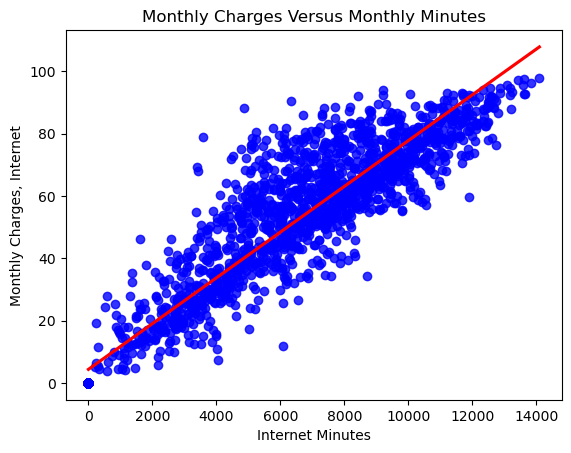

In [104]:
# Create a scatter plot with a regression line
sns.regplot(x=df['internet_min'], y=df['internet_monthly_charges'], data=df, ci=None, color='blue', line_kws={"color": "red"})

# Add labels
plt.xlabel("Internet Minutes")
plt.ylabel("Monthly Charges, Internet")
plt.title("Monthly Charges Versus Monthly Minutes")

# Show the plot
plt.show()

#### Since the internet charges are highly correlated with internet minutes per month, it will cause problem in the model
* Note the large amount of scatter, this suggests that the customers are experiencing different billing rates, that is the charge per min is not constant.
* Drop internet minutes and replace with internet charges divided by internet minutes.  
* If internet_min (the denominator) was zero, the charge per minute was set to the overall average Internet Charges Per Minute.

In [89]:
def internet_charge_per_min_1(row):
    if row["internet_min"] == 0:
        return pd.NA
    else:
        return row["internet_monthly_charges"] / row["internet_min"]
    
def internet_charge_per_min_final(row):
    if row["internet_min"] == 0:
        # hard coded the 0.008724 to use the avg value if it cannot be computed
        return 0.008724
    else:
        return row["internet_monthly_charges"] / row["internet_min"]

df["internet_charge_per_min"] = df.apply(lambda row: internet_charge_per_min_1(row), axis=1)

# display(df[["internet_monthly_charges","internet_min","internet_charge_per_min"]].head(10))

avg_charge_per_min = df[["internet_charge_per_min"]].mean()

df["internet_charge_per_min"] = df.apply(lambda row: internet_charge_per_min_final(row), axis=1)

display(f"ave charge per min is: {avg_charge_per_min}")


df.isnull().sum()

'ave charge per min is: internet_charge_per_min    0.008724\ndtype: object'

gender                              0
tenure                              0
phone_services                      0
internet_services                   0
contract_duration                   0
payment_method                      0
number_customer_service_calls       0
phone_min                           0
internet_min                        0
phone_monthly_charges               0
internet_monthly_charges            0
avg_monthly_bill                    0
churn                               0
trigger_point                       0
churn_surv                          0
uuid                                0
trigger_price                       0
trigger_quality                     0
trigger_external                    0
cluster                             0
treatment                        1578
churn_after_treatment               0
internet_charge_per_min             0
dtype: int64

### Clean up dataframe for churns and split into x and y dataframes
* Drop treatment because of missing values
* Drop uuid since it is not value added
* Columns with trigger or cluster in the column names did not look promissing either.  We have not found a data dictionary.
* Place churn goes in the y dataframe and all other predictor columns go into the x dataframe

In [90]:

# string columns need to be encoded. Let's find these.  We'll test all that are object type.
for the_col in df.columns:
    if df[the_col].dtype in ['o','O'] and the_col not in ['uuid','treatment']:
        print("the uniqu values for ",the_col," are: ")
        print(df[the_col].unique())

# this gave me the unique values, let's enclode them
df['gender_encoded'] = df['gender'].map({'Female': 0, 'Male': 1})  
df['contract_duration_encoded'] = df['contract_duration'].map({'short-term': 0, 'long-term': 1})

# Note: since this is a liniear model and our Exploratory Data Analysis Showed email was the highest churn and 
# and mail was the lowest, I've order these 
df['payment_method_encoded'] = df['payment_method'].map({'mail': 0, 'email': 2, 'automatic transfer': 1})  

# df['gender_encoded','gender','contract_duration_encoded','contract_duration','payment_method_encoded','payment_method'].head()
df[['gender','gender_encoded','contract_duration_encoded','contract_duration', 'payment_method','payment_method_encoded']].tail(15)

the uniqu values for  gender  are: 
['Female' 'Male']
the uniqu values for  contract_duration  are: 
['short-term' 'long-term']
the uniqu values for  payment_method  are: 
['mail' 'email' 'automatic transfer']


,gender,gender_encoded,contract_duration_encoded,contract_duration,payment_method,payment_method_encoded
1921,Male,1,1,long-term,mail,0
1922,Male,1,0,short-term,mail,0
1923,Female,0,0,short-term,automatic transfer,1
1924,Male,1,0,short-term,email,2
1925,Female,0,0,short-term,email,2
1926,Female,0,0,short-term,email,2
1927,Male,1,1,long-term,automatic transfer,1
1928,Female,0,1,long-term,email,2
1929,Male,1,1,long-term,automatic transfer,1
1930,Male,1,1,long-term,automatic transfer,1


### Prepare and run the Logistic Regression Model
* Set up X and y datasets for both train and test
* Scale the data using z-score scaling
* Train the model
* Use the model to calculate the predicted (y_predicted)

In [91]:

# code based on output from ChatGPT, with quite a bit of customation
# internet_min dropped because of cross correlation with internet_charges. Made new feature "internet_charge_per_min" which may perform better
X2 = df.drop(['churn','treatment','uuid','trigger_price','trigger_point','trigger_quality','trigger_external','churn_after_treatment','churn_surv','cluster', 'internet_min'], axis=1) 
# could have done this in one step, but doing another drop for the columns I just encoded.
X = X2.drop(['gender','contract_duration','payment_method'], axis=1)

# now define the y dataframe. initite it was only 'churn'
y = df['churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=2000)  # Increase max_iter if the model doesn't converge

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Model Accuracy: {accuracy_percent:.1f} %")



Model Accuracy: 87.8 %


### General investigations
* Confusion matrix
* Feature importance

In [92]:
X.head()
# Need a data dictionary, or probably should drop 'cluster and churn_surv

,tenure,phone_services,internet_services,number_customer_service_calls,phone_min,phone_monthly_charges,internet_monthly_charges,avg_monthly_bill,internet_charge_per_min,gender_encoded,contract_duration_encoded,payment_method_encoded
0,1,1,1,2,112.236770,19.082281,37.339460,30.425,0.006314,0,0,0
1,1,1,1,1,122.333978,20.798307,16.970133,16.891,0.004365,1,0,2
2,1,0,1,2,0.000000,0.000000,19.850445,18.799,0.006749,1,0,0
3,1,1,1,2,115.213725,19.589318,25.895612,24.364,0.005861,0,0,0
4,1,0,1,2,0.000000,0.000000,30.499883,22.259,0.010929,1,0,0


In [93]:
def churn_accuracy_classifier(churn, pred_churn):
    # this calculates the components of the "confusion matrix" manually
    if churn == 1:
        if pred_churn == 1:
            return "actually churned and predicted a churn"
        else:
            return "actually churned but predicted NO churn"
    else:
        # here churn was zero
        if pred_churn == 0:
            return "actually retained and predicted being retained"
        else:
            return "actually retained but predicted a churn"


# the concat below is largely generated by chatGPT
# convert y_test and y_pred to dataframes so they can be combined (concat) with the X_test dataframe
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['y_predicted']).reset_index(drop=True)

# Combine X_test, y_test_df, and y_pred_df
combined_df = pd.concat([X_test.reset_index(drop=True), y_test_df, y_pred_df], axis=1)


display("churn value counts on the orig df are...")
display(df[["churn"]].value_counts())
display(y_test_df[["churn"]].value_counts())

combined_df["predicton_accuracy_by_type"] = combined_df[["churn","y_predicted"]].apply(lambda row: churn_accuracy_classifier(row['churn'], row['y_predicted']), axis=1)
print("Performance breakdown for the model performance for churning versus retained customers")
display(combined_df["predicton_accuracy_by_type"].value_counts())

print("Combined test data with churn and predicted churn")
display(combined_df.sample(10))

'churn value counts on the orig df are...'

churn
0        1440
1         496
Name: count, dtype: int64

churn
0        434
1        147
Name: count, dtype: int64

Performance breakdown for the model performance for churning versus retained customers


predicton_accuracy_by_type
actually retained and predicted being retained    421
actually churned and predicted a churn             89
actually churned but predicted NO churn            58
actually retained but predicted a churn            13
Name: count, dtype: int64

Combined test data with churn and predicted churn


,tenure,phone_services,internet_services,number_customer_service_calls,phone_min,phone_monthly_charges,internet_monthly_charges,avg_monthly_bill,internet_charge_per_min,gender_encoded,contract_duration_encoded,payment_method_encoded,churn,y_predicted,predicton_accuracy_by_type
492,2,0,1,2,0.000000,0.000000,46.489708,35.731455,0.010533,0,0,0,1,1,actually churned and predicted a churn
267,48,0,1,1,0.000000,0.000000,5.771953,31.847467,0.002637,0,0,2,0,0,actually retained and predicted being retained
354,65,1,1,2,140.272399,23.846409,83.945260,107.077983,0.007202,0,1,1,0,0,actually retained and predicted being retained
213,1,1,1,1,121.180751,20.603692,21.708006,21.653000,0.025473,1,0,2,1,1,actually churned and predicted a churn
72,65,1,0,2,148.802030,25.290567,0.000000,22.350845,0.008724,0,1,1,0,0,actually retained and predicted being retained
103,72,0,1,0,0.000000,0.000000,58.312458,71.617731,0.008271,0,1,1,0,0,actually retained and predicted being retained
112,3,0,1,0,0.000000,0.000000,32.549541,39.641200,0.005246,0,0,1,0,0,actually retained and predicted being retained
310,4,1,1,3,121.952729,20.732083,37.744035,41.141775,0.020952,0,0,2,1,1,actually churned and predicted a churn
444,8,1,1,0,119.904474,20.384195,56.780119,88.190279,0.007822,0,0,2,1,0,actually churned but predicted NO churn
524,72,0,1,0,0.000000,0.000000,51.912702,57.242103,0.010894,1,1,1,0,0,actually retained and predicted being retained


### Calculate the Confusion Matrix

In [94]:
# now lets do a confusion matrix (these values were manually calculated above in raw counts)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
display(cm)



array([[421,  13],
       [ 58,  89]], dtype=int64)

### Now we will visualize the confusion matrix

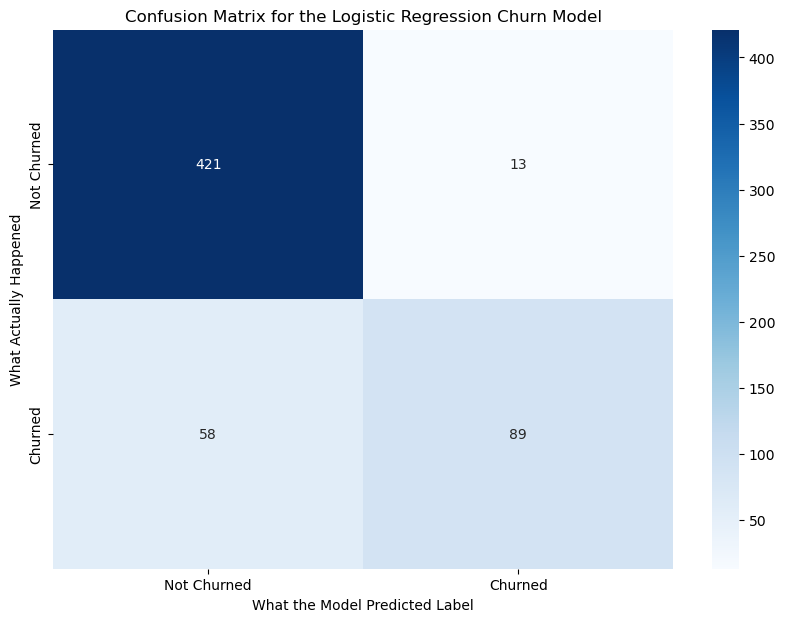

In [95]:
# Plot confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.title('Confusion Matrix for the Logistic Regression Churn Model')
plt.ylabel('What Actually Happened')
plt.xlabel('What the Model Predicted Label')
plt.show()


### Model prediction from another angle

In [96]:
display(cm)

cm[0,1]

# if the model predicts retension (no churn), what % of the time is it correct?
No_churn_predited_performance = cm[0,0]/(cm[0,0]+cm[1,0])*100
churn_predited_performance = cm[1,1]/(cm[0,1]+cm[1,1])*100
print(f'If the model predicts "No churn", it is correct {No_churn_predited_performance:.1f} % of the time')
print(f'If the model predicts "Churn",    it is correct {churn_predited_performance:.1f} % of the time')

array([[421,  13],
       [ 58,  89]], dtype=int64)

If the model predicts "No churn", it is correct 87.9 % of the time
If the model predicts "Churn",    it is correct 87.3 % of the time


#### Feature Importance and Linear Coefficients

In [97]:
# Feature importance and coefficients
importance = model.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v}')

display("type of importance: ", type(importance))
display(importance)

Feature: tenure, Score: -0.8289605194096185
Feature: phone_services, Score: 0.18155867158243472
Feature: internet_services, Score: -0.06295261266276134
Feature: number_customer_service_calls, Score: 0.25386384978201865
Feature: phone_min, Score: -0.1185854614458896
Feature: phone_monthly_charges, Score: -0.1152899883512038
Feature: internet_monthly_charges, Score: 1.2879979428381545
Feature: avg_monthly_bill, Score: -0.40836540970354884
Feature: internet_charge_per_min, Score: 1.8856297312726868
Feature: gender_encoded, Score: -0.03325756213895626
Feature: contract_duration_encoded, Score: -0.5802789038448315
Feature: payment_method_encoded, Score: 0.30571633165170736


'type of importance: '

numpy.ndarray

array([-0.82896052,  0.18155867, -0.06295261,  0.25386385, -0.11858546,
       -0.11528999,  1.28799794, -0.40836541,  1.88562973, -0.03325756,
       -0.5802789 ,  0.30571633])

### Visualize the feature importance

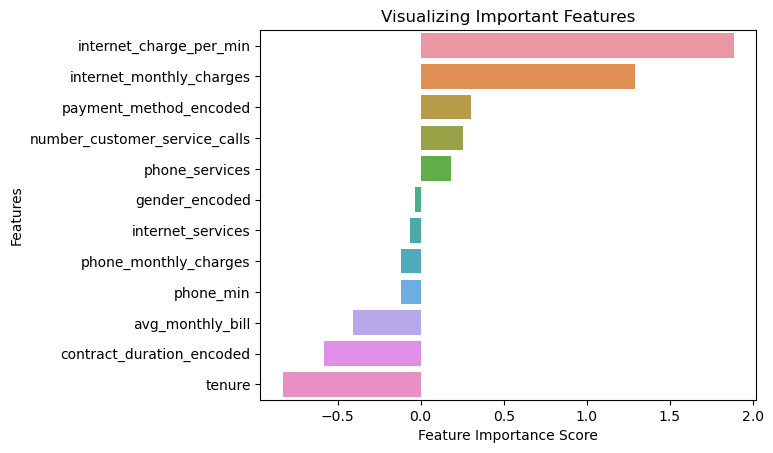

In [98]:
# Use feature importance from any of the methods above
feature_scores = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model is complete
